In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
from mhkit import wave
import pandas as pd
import os

ModuleNotFoundError: No module named 'calkit'

In [ ]:
# Determine root_dir
if "__file__" in globals():
    # Running as a script
    script_dir = os.path.dirname(os.path.abspath(__file__))
else:
    script_dir = os.getcwd()

# Traverse up to WEC-DECIDER root
root_dir = os.path.abspath(os.path.join(script_dir, "..", ".."))  
cem_dir = os.path.join(root_dir, "modules", "CEM")

In [11]:

data_type = '3-hour'
year = [2010]
parameters = [
    'omni-directional_wave_power',
    'significant_wave_height',
    'energy_period',
    'directionality_coefficient',
    'maximum_energy_direction',
    'mean_absolute_period',
    'mean_zero-crossing_period',
    'peak_period',
    'spectral_width'
]
lat_lon = (43.5, -70) # off coast of Maine
data, metadata = wave.io.hindcast.hindcast.request_wpto_point_data(data_type, parameters, lat_lon, year)
data.head()

,omni-directional_wave_power_0,significant_wave_height_0,energy_period_0,directionality_coefficient_0,maximum_energy_direction_0,mean_absolute_period_0,mean_zero-crossing_period_0,peak_period_0,spectral_width_0
time_index,,,,,,,,,
2010-01-01 00:00:00+00:00,1250.461548,0.59368,4.0172,0.898,172.5,4.9468,7.1971,10.9619,0.5247
2010-01-01 03:00:00+00:00,1488.557739,0.61967,4.1974,0.792,142.5,5.2501,7.7880,12.0135,0.5248
2010-01-01 06:00:00+00:00,1397.676758,0.60245,4.2983,0.797,127.5,5.3097,7.7302,12.0135,0.5230
2010-01-01 09:00:00+00:00,1351.827881,0.59589,4.3503,0.807,127.5,5.3221,7.6388,12.0135,0.5241
2010-01-01 12:00:00+00:00,1342.985474,0.59008,4.4666,0.825,127.5,5.4596,7.7342,12.0135,0.5120


In [12]:
data_mod = data.copy()

rho_w = 1025  # kg/m^3, density of water
g = 9.81  # m/s^2, acceleration due to gravity
#J_calc = data_mod["significant_wave_height_0"]**2 * rho_w * g**2 / (64 * np.pi) * data_mod["energy_period_0"]
J_calc = data_mod["significant_wave_height_0"]**2 * rho_w * g**2 / (64 * np.pi) * data_mod["mean_zero-crossing_period_0"]
fudge = 1 - .007 * (data_mod["mean_zero-crossing_period_0"] - (2*np.pi)) 
data_mod["Power_density_predicted"] = J_calc / fudge #/ data_mod["spectral_width_0"] #* data_mod["directionality_coefficient_0"]
data_mod["ratio_power_density"] = data_mod["omni-directional_wave_power_0"] / data_mod["Power_density_predicted"]

data_mod.head()


,omni-directional_wave_power_0,significant_wave_height_0,energy_period_0,directionality_coefficient_0,maximum_energy_direction_0,mean_absolute_period_0,mean_zero-crossing_period_0,peak_period_0,spectral_width_0,Power_density_predicted,ratio_power_density
time_index,,,,,,,,,,,
2010-01-01 00:00:00+00:00,1250.461548,0.59368,4.0172,0.898,172.5,4.9468,7.1971,10.9619,0.5247,1252.511475,0.998363
2010-01-01 03:00:00+00:00,1488.557739,0.61967,4.1974,0.792,142.5,5.2501,7.7880,12.0135,0.5248,1482.783813,1.003894
2010-01-01 06:00:00+00:00,1397.676758,0.60245,4.2983,0.797,127.5,5.3097,7.7302,12.0135,0.5230,1390.548584,1.005126
2010-01-01 09:00:00+00:00,1351.827881,0.59589,4.3503,0.807,127.5,5.3221,7.6388,12.0135,0.5241,1343.476685,1.006216
2010-01-01 12:00:00+00:00,1342.985474,0.59008,4.4666,0.825,127.5,5.4596,7.7342,12.0135,0.5120,1334.759277,1.006163


Text(0, 0.5, 'J calc / J ')

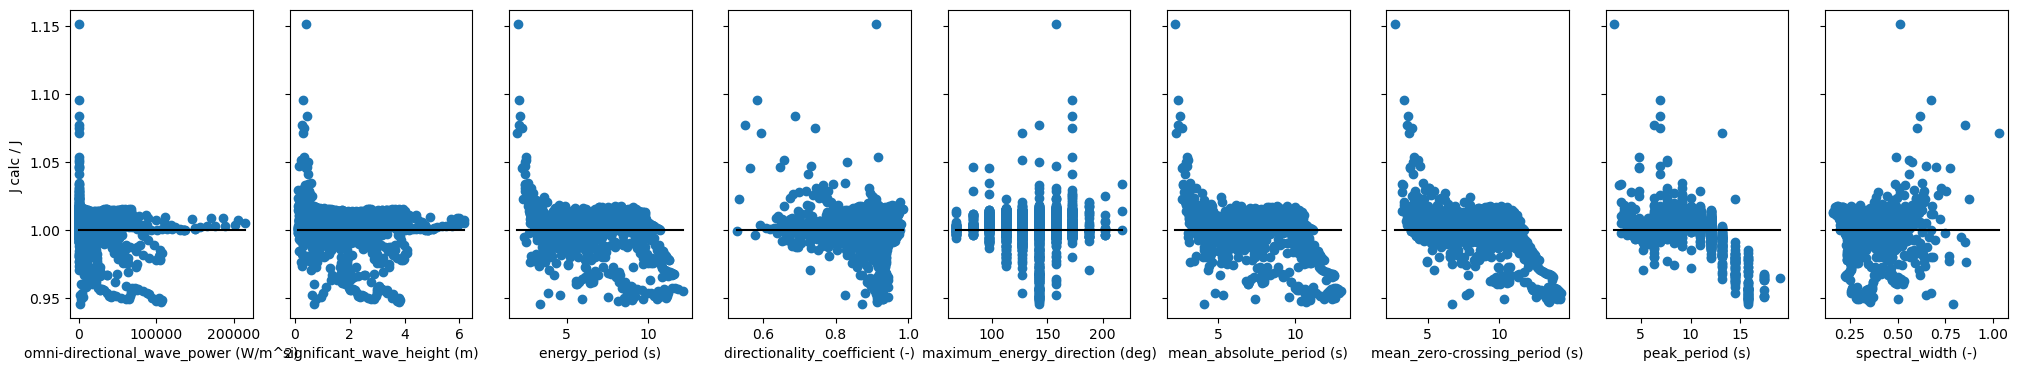

In [13]:
fig, ax = plt.subplots(1, parameters.__len__(), sharey=True, figsize=(25, 4))
units = ["W/m^2", "m", "s", "-", "deg", "s", "s", "s", "-"]
for i in range(parameters.__len__()):
    col = parameters[i] + "_0"
    if False: #"period" in col and col != "energy_period_0":
        normalize = True
        norm = data_mod["energy_period_0"]
    else:
        norm = 1
        normalize = False
    x_data = data_mod[col] / norm
    ax[i].scatter(x_data, 1/data_mod["ratio_power_density"])
    label = parameters[i] + " (" + units[i] + ")"
    if normalize:
        label += " / " + "energy_period" + " (s)"
    ax[i].set_xlabel(label)
    ax[i].plot([x_data.min(), x_data.max()], [1, 1], color='k')
ax[0].set_ylabel("J calc / J ")

In [14]:
# capture width
G = 1 # gain for heave (=2 for surge/pitch)
omega = 2 * np.pi / data_mod["mean_zero-crossing_period_0"]

zeta_range = [.05, .1, .2]
omega_n_range = [0.4, 0.5, 0.6, 0.7]
ZETA, OMEGA, OMEGA_N = np.meshgrid(zeta_range, omega, omega_n_range)

B_u = 1e5 * OMEGA * np.exp(-OMEGA**2) # rayleigh distrubution shape for now
CW_max = G * g / OMEGA**2 # radiation limit

real = 1 - (OMEGA / OMEGA_N)**2
imag = 2 * ZETA * OMEGA / OMEGA_N
mag_RAO_sq = 1/( real**2 + imag**2 )
CW_frac_raw = 2 * B_u * OMEGA**5 * mag_RAO_sq / (G * g**3 * rho_w)
CW_frac = np.minimum(CW_frac_raw, 1)
CW = CW_frac * CW_max

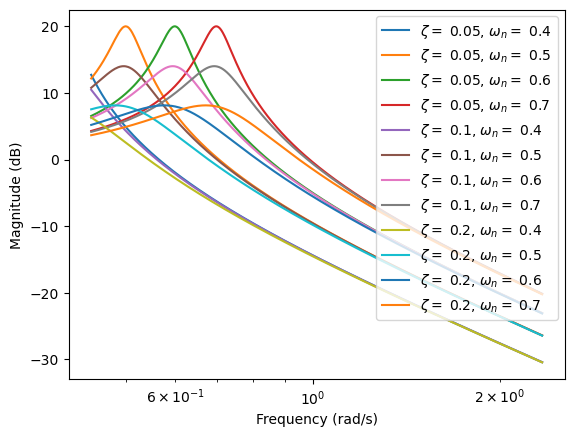

In [15]:
# bode plot to check mag RAO
fig, ax = plt.subplots()
for i in range(len(zeta_range)):
    for j in range(len(omega_n_range)):
        x_data = OMEGA[:, i, j]
        y_data = 20 * np.log10(np.sqrt(mag_RAO_sq[:, i, j]))
        sorted_indices = np.argsort(x_data)
        x_data = x_data[sorted_indices]
        y_data = y_data[sorted_indices]
        ax.semilogx(x_data, y_data, label="$\zeta =$ " + str(zeta_range[i]) + ", $\omega_n =$ " + str(omega_n_range[j]))
ax.set_xlabel("Frequency (rad/s)")
ax.set_ylabel("Magnitude (dB)")
ax.legend()

Text(0.02, 0.5, 'Raw CW fraction')

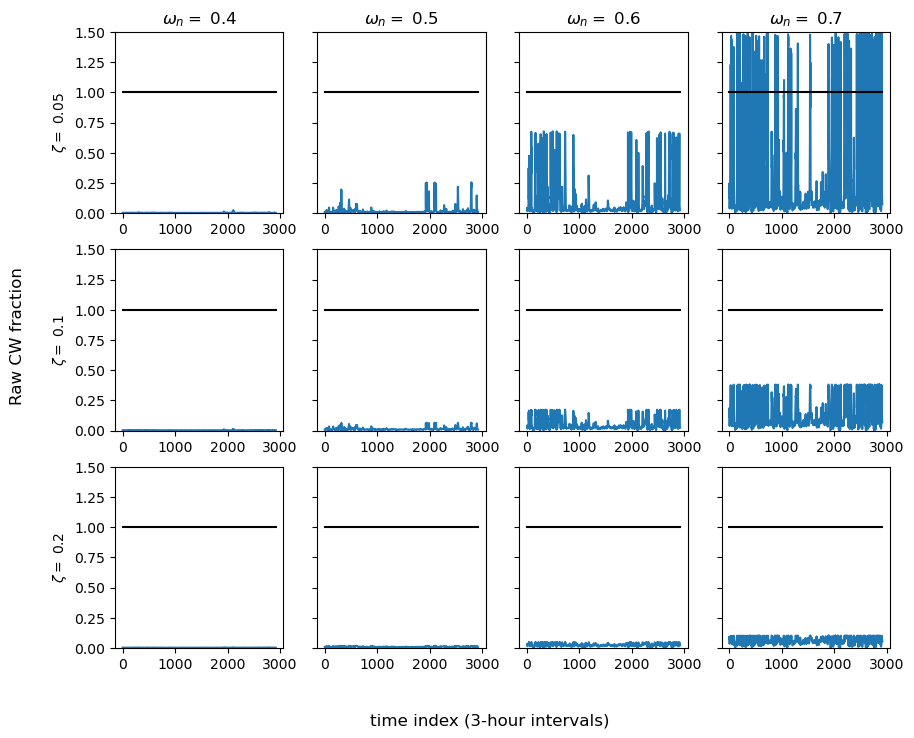

In [16]:
# plot time series of CW fraction
fig, ax = plt.subplots(len(zeta_range), len(omega_n_range), sharey=True, figsize=(10,8))
for i in range(len(zeta_range)):
    for j in range(len(omega_n_range)):
        ax[i, j].plot(CW_frac_raw[:, i, j])
        ax[i, j].plot([0, len(CW_frac_raw[:, i, j])], [1, 1], 'k')
        if i == 0:
            ax[i, j].set_title("$\omega_n =$ " + str(omega_n_range[j]))
        if j == 0:
            ax[i, j].set_ylabel("$\zeta =$ " + str(zeta_range[i]))
        ax[i, j].set_ylim([0, 1.5])
fig.supxlabel("time index (3-hour intervals)")
fig.supylabel("Raw CW fraction")

In [17]:
# Apply different power limits for each zeta and omega_n
P_lim_list = np.concatenate( (np.linspace(0.005, 0.025, num=5), np.linspace(0.03, 0.09, num=7), np.linspace(0.1,0.9,num=9)) )

for i in range(len(zeta_range)):
    for j in range(len(omega_n_range)):
        key_unlimited = "Avail_zeta_" + str(zeta_range[i]) + "_omega_n_" + str(omega_n_range[j])
        data_unlimited = CW_frac[:, i, j] / np.max(CW_frac[:, i, j])
        for P_limit in P_lim_list:
            key_limited = key_unlimited + "_limited_" + str(int(P_limit*1000))
            data_mod[key_limited] = np.minimum(data_unlimited, P_limit) / P_limit
        data_mod[key_unlimited] = data_unlimited

pd.set_option('display.max_rows', None)
means = data_mod.mean()
num_cols_added = 2
CFs = np.array(means)[(len(parameters)+num_cols_added):]
print(means)
print("Capacity factors: ",CFs)

omni-directional_wave_power_0              10861.985352
significant_wave_height_0                      1.255046
energy_period_0                                5.798270
directionality_coefficient_0                   0.894608
maximum_energy_direction_0                   138.585617
mean_absolute_period_0                         6.459770
mean_zero-crossing_period_0                    7.465244
peak_period_0                                  8.898335
spectral_width_0                               0.327541
Power_density_predicted                    10847.621094
ratio_power_density                            0.997325
Avail_zeta_0.05_omega_n_0.4_limited_5          1.000000
Avail_zeta_0.05_omega_n_0.4_limited_10         0.999849
Avail_zeta_0.05_omega_n_0.4_limited_15         0.999785
Avail_zeta_0.05_omega_n_0.4_limited_20         0.999753
Avail_zeta_0.05_omega_n_0.4_limited_25         0.999503
Avail_zeta_0.05_omega_n_0.4_limited_30         0.999139
Avail_zeta_0.05_omega_n_0.4_limited_40         0

/tmp/ipykernel_2177863/2548537028.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_mod[key_limited] = np.minimum(data_unlimited, P_limit) / P_limit
/tmp/ipykernel_2177863/2548537028.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_mod[key_limited] = np.minimum(data_unlimited, P_limit) / P_limit
/tmp/ipykernel_2177863/2548537028.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

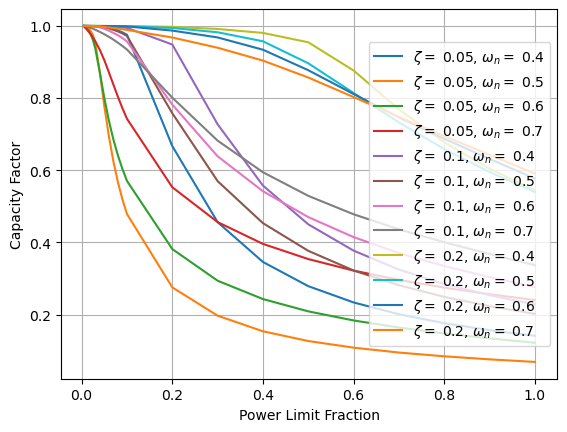

In [18]:

P_lim_list_full = np.concatenate((P_lim_list,[1]))
lens = (len(P_lim_list_full),len(zeta_range), len(omega_n_range))
P_lim_frac = np.broadcast_to(P_lim_list_full[:,None,None], lens)
CF_matrix = np.reshape(CFs, (lens[1],lens[2],lens[0])).transpose(2, 0, 1)

fig, ax = plt.subplots()
for i in range(len(zeta_range)):
    for j in range(len(omega_n_range)):
        ax.plot(P_lim_frac[:, i, j], CF_matrix[:, i, j], label="$\zeta =$ " + str(zeta_range[i]) + ", $\omega_n =$ " + str(omega_n_range[j]))
ax.set_ylabel('Capacity Factor')
ax.set_xlabel('Power Limit Fraction')

ax.legend(loc='center right')
ax.grid()
plt.show()

In [19]:
"""
fig, ax = plt.subplots()
plt.hist(data_mod.Avail, bins=200, density=True)
plt.xlabel('Normalized Power')
plt.ylabel('Probability Density')

fig, ax = plt.subplots()
plt.hist(data_mod.Avail, bins=200, density=True)
plt.plot([0.02, 0.02],[0,12],'k--', [0.04,0.04],[0,4.5],'k--', [0.06,0.06],[0,2.2],'k--',
          [0.08,0.08],[0,1.5],'k--', [0.1,0.1],[0,1.5],'k--')
plt.xlim([0,0.12])
"""

"\nfig, ax = plt.subplots()\nplt.hist(data_mod.Avail, bins=200, density=True)\nplt.xlabel('Normalized Power')\nplt.ylabel('Probability Density')\n\nfig, ax = plt.subplots()\nplt.hist(data_mod.Avail, bins=200, density=True)\nplt.plot([0.02, 0.02],[0,12],'k--', [0.04,0.04],[0,4.5],'k--', [0.06,0.06],[0,2.2],'k--',\n          [0.08,0.08],[0,1.5],'k--', [0.1,0.1],[0,1.5],'k--')\nplt.xlim([0,0.12])\n"

In [20]:
cap_costs = np.linspace(500e3, 1500e3, 5) # USD/MW
years = [2030,2045]
P_lims = np.array([0.2, 0.4, 0.6, 0.8, 1.0])

cap_cost_mesh, year_mesh = np.meshgrid(cap_costs, years)
cap_cost_vec = cap_cost_mesh.flatten()
year_vec = year_mesh.flatten()

print(cap_cost_vec)
print(year_vec)

wave_cost_str = [f"Wave_{cap_cost/1e3:.0f}" for cap_cost in cap_costs] # $k/MW
print(wave_cost_str)
wave_cost_str_repeated = np.matlib.repmat(wave_cost_str, len(years), 1).flatten()

print(wave_cost_str_repeated)

#P_lim_string = (P_lim_vec*1000).astype(int).astype(str)
#keys = np.char.add( np.repeat("Avail_limited_",np.size(P_lim_vec)), P_lim_string )
#print(keys)

# use CF to lookup power limit and corresponding availability timeseries

[ 500000.  750000. 1000000. 1250000. 1500000.  500000.  750000. 1000000.
 1250000. 1500000.]
[2030 2030 2030 2030 2030 2045 2045 2045 2045 2045]
['Wave_500', 'Wave_750', 'Wave_1000', 'Wave_1250', 'Wave_1500']
['Wave_500' 'Wave_750' 'Wave_1000' 'Wave_1250' 'Wave_1500' 'Wave_500'
 'Wave_750' 'Wave_1000' 'Wave_1250' 'Wave_1500']


In [ ]:
# make a separate csv per profile
variability_names = []
location_folder = cem_dir + '/data_east/'
profile_folder = location_folder + 'wave_profiles/'
if not os.path.exists(profile_folder):
    os.makedirs(profile_folder)

for P_limit in P_lims:
    for i in range(len(zeta_range)):
        for j in range(len(omega_n_range)):
            key_unlimited = "Avail_zeta_" + str(zeta_range[i]) + "_omega_n_" + str(omega_n_range[j])
            key_limited = key_unlimited + "_limited_" + str(int(P_limit*1000))
            if P_limit == 1:
                key = key_unlimited
            else:
                key = key_limited
            profile_data = data_mod[key].values
            profile_hourly = np.interp(np.arange(0, 8760), np.arange(0, 8760, 3), profile_data)

            csv_data = pd.DataFrame()
            csv_data["technology"] = wave_cost_str_repeated
            csv_data["planning_year"] = year_vec
            csv_data["capex_mw"] = cap_cost_vec
            csv_data["capex_mwh"] = 0
            csv_data["fixed_o_m_mw"] = cap_cost_vec / 10
            csv_data["fixed_o_m_mwh"] = 0
            csv_data["variable_o_m_mwh"] = 0
            csv_data["wacc_real"] = 0.07
            csv_data["dollar_year"] = 2014
            csv_data["heat_rate"] = 0
            csv_data["profile"] = np.array2string(profile_hourly, separator=',', precision=4, threshold=np.inf)

            csv_data.to_csv(profile_folder + key_limited +'.csv',index=False)
            variability_names.append(key_limited)

csv_data.head()


,technology,planning_year,capex_mw,capex_mwh,fixed_o_m_mw,fixed_o_m_mwh,variable_o_m_mwh,wacc_real,dollar_year,heat_rate,profile
0,Wave_500,2030,500000.0,0,50000.0,0,0,0.07,2014,0,"[0.7509,0.8038,0.8567,0.9096,0.9048,0.9 ,0.8..."
1,Wave_750,2030,750000.0,0,75000.0,0,0,0.07,2014,0,"[0.7509,0.8038,0.8567,0.9096,0.9048,0.9 ,0.8..."
2,Wave_1000,2030,1000000.0,0,100000.0,0,0,0.07,2014,0,"[0.7509,0.8038,0.8567,0.9096,0.9048,0.9 ,0.8..."
3,Wave_1250,2030,1250000.0,0,125000.0,0,0,0.07,2014,0,"[0.7509,0.8038,0.8567,0.9096,0.9048,0.9 ,0.8..."
4,Wave_1500,2030,1500000.0,0,150000.0,0,0,0.07,2014,0,"[0.7509,0.8038,0.8567,0.9096,0.9048,0.9 ,0.8..."


In [ ]:
# make a scenario inputs csv

# grid scenarios (2 dof, 3 options each): electrification, carbon_constraint
# year (1 dof, 2 options)
# design scenarios (2 dof capturing 4 dof, with 3, 4, 5, and 3 options): wave variability (zeta, omega_n, and power limit), wave cost

# total 9 grid scenarios, 2 years, 180 design scenarios = 3240 scenario rows

electrification = ['ref','med','high']
carbon_constraint = ['low','med','high']
scenario_vals = (electrification, carbon_constraint, variability_names, wave_cost_str) # all possible values, for yaml

# values to use in this sweep
#indices_in_use = [[0],[1],range(len(variability_names)),range(len(wave_cost_str))]
indices_in_use = [[0],[1],[0],range(len(wave_cost_str))]
idx_years_used = 0
scenario_vals_used = tuple(
    [[scenario_vals[i][idx] for idx in idx_list] for i, idx_list in enumerate(indices_in_use)]
)
scenario_mesh_tuple = np.meshgrid(years[idx_years_used], *scenario_vals_used, indexing='ij')

scenario_col_names = ['year', 'electrification', 'carbon_constraint', 'wave_variability', 'wave_cost']

scenario_inputs = pd.DataFrame()
scenario_inputs["case_id"] = ['Case_' + str(i) for i in np.arange(1, len(scenario_mesh_tuple[0].flatten()) + 1)]

scenario_inputs[scenario_col_names] = np.array([scenario_col.flatten() for scenario_col in scenario_mesh_tuple]).T

print(len(scenario_inputs))
scenario_inputs.head()
scenario_inputs.to_csv(location_folder + 'scenario_input.csv',index=False)


5


In [ ]:
# make a settings management for power genome
import yaml

pg_settings_names = ['electrification_scenario', 'emission_policies_fn', 'additional_technologies_fn', 'additional_new_gen']

elec_val_names = ['REFERENCE ELECTRIFICATION - MODERATE TECHNOLOGY ADVANCEMENT', 'MEDIUM ELECTRIFICATION - MODERATE TECHNOLOGY ADVANCEMENT', 'HIGH ELECTRIFICATION - MODERATE TECHNOLOGY ADVANCEMENT']
carbon_val_names = ['emission_policies_net_zero.csv','emission_policies_orig.csv','emission_policies_no_limit.csv']
wave_var_names = ['wave_profiles/' + key + '.csv' for key in variability_names]
wave_cost_val_names = [[str] for str in wave_cost_str] # turn list of strs into list of lists

pg_val_names = [elec_val_names, carbon_val_names, wave_var_names, wave_cost_val_names]

idxs = range(len(scenario_col_names)-1)
scenario_inner_dicts = [dict(zip(scenario_vals[i], \
                               [{pg_settings_names[i]:val} for val in pg_val_names[i]] \
                             )) for i in idxs]
scenario_dict = dict(zip(scenario_col_names[1:], scenario_inner_dicts))
settings_management = {'settings_management': {year: scenario_dict for year in years}}

print(f"scenario inner dicts: {scenario_inner_dicts}")
print(f"scenario dict: {scenario_dict}")
print(f"settings management: {settings_management}")

with open(location_folder + 'settings/settings_management.yml', 'w') as f:
    yaml.dump(settings_management, f, sort_keys=False)



scenario inner dicts: [{'ref': {'electrification_scenario': 'REFERENCE ELECTRIFICATION - MODERATE TECHNOLOGY ADVANCEMENT'}, 'med': {'electrification_scenario': 'MEDIUM ELECTRIFICATION - MODERATE TECHNOLOGY ADVANCEMENT'}, 'high': {'electrification_scenario': 'HIGH ELECTRIFICATION - MODERATE TECHNOLOGY ADVANCEMENT'}}, {'low': {'emission_policies_fn': 'emission_policies_net_zero.csv'}, 'med': {'emission_policies_fn': 'emission_policies_orig.csv'}, 'high': {'emission_policies_fn': 'emission_policies_no_limit.csv'}}, {'Avail_zeta_0.05_omega_n_0.4_limited_200': {'additional_technologies_fn': 'wave_profiles/Avail_zeta_0.05_omega_n_0.4_limited_200.csv'}, 'Avail_zeta_0.05_omega_n_0.5_limited_200': {'additional_technologies_fn': 'wave_profiles/Avail_zeta_0.05_omega_n_0.5_limited_200.csv'}, 'Avail_zeta_0.05_omega_n_0.6_limited_200': {'additional_technologies_fn': 'wave_profiles/Avail_zeta_0.05_omega_n_0.6_limited_200.csv'}, 'Avail_zeta_0.05_omega_n_0.7_limited_200': {'additional_technologies_fn':

using Pkg
Pkg.activate("GenX")
]
include("caserunner.jl")